In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
import pandas as pd

In [2]:
%cd D:\SEM-7 project course\code\USPOP\Dataset

D:\SEM-7 project course\code\USPOP\Dataset


In [3]:
import os

files = os.listdir(r"D:\SEM-7 project course\code\USPOP\Dataset")

In [4]:
missing_files = []
for lat in range(100):
    for lng in range(70):
        image_path = str(lat) + '_' + str(lng) + '.png'
        if image_path not in files:
            print(image_path)
            missing_files.append(image_path)

0_4.png


58_31.png
63_40.png
70_60.png
71_24.png
73_19.png
74_8.png
74_54.png
80_49.png
80_53.png
81_68.png
83_0.png
83_53.png
83_56.png
85_35.png
86_23.png
87_45.png
88_1.png


In [5]:
missing_files

['0_4.png',
 '58_31.png',
 '63_40.png',
 '70_60.png',
 '71_24.png',
 '73_19.png',
 '74_8.png',
 '74_54.png',
 '80_49.png',
 '80_53.png',
 '81_68.png',
 '83_0.png',
 '83_53.png',
 '83_56.png',
 '85_35.png',
 '86_23.png',
 '87_45.png',
 '88_1.png']

In [6]:
dataX = np.empty((7000, 200, 200, 3))

count = 0
for Lat in range(100):
    for Lng in range(70):
        image_path = str(Lat) + '_' + str(Lng) + '.png'
        if image_path not in missing_files:
            dataX[count] = cv2.imread('./' + str(Lat) + '_' + str(Lng) + '.png')
            count+=1
        elif image_path in missing_files:
            print(f"{image_path}: location in matrix: {count}" )
            count +=1

dataX = dataX.astype(np.uint8)

0_4.png: location in matrix: 4
58_31.png: location in matrix: 4091
63_40.png: location in matrix: 4450
70_60.png: location in matrix: 4960
71_24.png: location in matrix: 4994
73_19.png: location in matrix: 5129
74_8.png: location in matrix: 5188
74_54.png: location in matrix: 5234
80_49.png: location in matrix: 5649
80_53.png: location in matrix: 5653
81_68.png: location in matrix: 5738
83_0.png: location in matrix: 5810
83_53.png: location in matrix: 5863
83_56.png: location in matrix: 5866
85_35.png: location in matrix: 5985
86_23.png: location in matrix: 6043
87_45.png: location in matrix: 6135
88_1.png: location in matrix: 6161


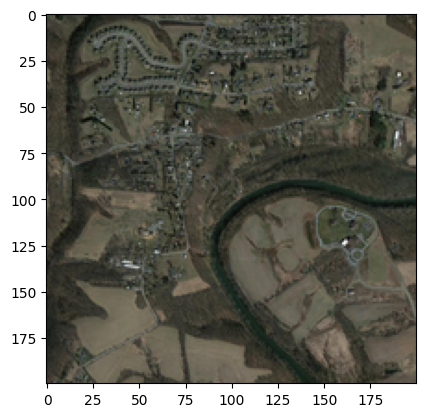

In [12]:
temp = cv2.cvtColor(dataX[6999], cv2.COLOR_BGR2RGB)
plt.imshow(temp)
#plt.imshow(imageio.imread('./images/0_0.png'))
plt.show()

In [24]:
%cd D:\SEM-7 project course\code\USPOP

D:\SEM-7 project course\code\USPOP


In [25]:
with open('dataX', 'wb') as fp:
    pickle.dump(dataX, fp, protocol=2)

In [26]:
df_loaded = pd.read_csv(r"D:\SEM-7 project course\code\USPOP\labels.csv", index_col=0)

In [27]:
dataY = np.empty((7000))
count1 = 0
for Lat in range(99,-1,-1):
    for Lng in range(70):
        dataY[count1] = df_loaded.iloc[Lat,Lng]
        count1+=1

In [28]:
dataY[4]

19.706005

In [29]:
with open('dataY', 'wb') as fp:
    pickle.dump(dataY, fp, protocol=2)

In [30]:
dataX.shape

(7000, 200, 200, 3)

In [31]:
dataX.shape[0]

7000